<img src="PCSJC.jpg" height="1px">

# Análise da Produtividade da Polícia Civil de São José dos Campos - SP.

* Este projeto tem como objetivo levantar algumas hipóteses sobre a produtividade policial da Polícia Civil de São José dos Campos - SP dos anos de 2019 e 2020, retirados do site da Secretaria de Segurança Pública de São Paulo (SSP-SP). Para realizar a análise, foram utilizadas as bibliotecas Pandas, Numpy, Mayplotlib e Seaborn do Python. Foram levantadas e respondidas 6 hipóteses.



* O dataset original sofreu algumas alterações para que as análises pudessem ter sido feitas. O mesmo contém dados de 2019, 2020 e Janeiro de 2021, mas os dados de Janeiro de 2021 foram retirados. Assim, foram analisados apenas os anos de 2019 e 2020, que contém os dados de todos os meses daqueles anos.



* Link original: http://www.ssp.sp.gov.br/Estatistica/Pesquisa.aspx

# Hipóteses Levantadas

* 1 - Cresceu o número de ocorrências de porte ilegal de arma em São José dos Campos
* 2 - 2019 teve menos ocorrências por tráfico de entorpecentes em relação ao ano de 2020
* 3 - Em 2020, o número de veículos recuperados foi maior em março
* 4 - O número de presos em flagrantes é maior que o número de presos por mandado em 2 anos
* 5 - O total de inquéritos policiais instaurados subiu em 2020. O pico foi no mês de Março
* 6 - O número de prisões efetuadas foi maior em Outubro de 2020 do que em Fevereiro de 2019.

In [1]:
#Importando as bibliotecas
import pandas as pd 
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")

In [3]:
#Abrindo o dataset
df = pd.read_csv('https://raw.githubusercontent.com/Daniel-RPS/Produtividade-Policial-SJC/main/Produtividade%20Policial%20SJC.csv', sep=';', encoding='ISO-8859-1')
df.head()

,ANO,MÊS,OCORRÊNCIAS DE PORTE DE ENTORPECENTES,OCORRÊNCIAS DE TRÁFICO DE ENTORPECENTES,OCORRÊNCIAS DE APREENSÃO DE ENTORPECENTES(1),OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,Nº DE ARMAS DE FOGO APREENDIDAS,Nº DE FLAGRANTES LAVRADOS,Nº DE INFRATORES APREENDIDOS EM FLAGRANTE,Nº DE INFRATORES APREENDIDOS POR MANDADO,Nº DE PESSOAS PRESAS EM FLAGRANTE,Nº DE PESSOAS PRESAS POR MANDADO,Nº DE PRISÕES EFETUADAS,Nº DE VEÍCULOS RECUPERADOS,TOT. DE INQUÉRITOS POLICIAIS INSTAURADOS
0,2019,JANEIRO,6,49,1,4,13,106,30,4,114,55,161,71,401
1,2019,FEVEREIRO,10,33,0,7,14,94,23,7,104,73,167,70,463
2,2019,MARÇO,6,47,3,12,18,99,34,17,116,45,144,70,411
3,2019,ABRIL,7,43,1,7,12,121,24,13,135,52,173,77,490
4,2019,MAIO,11,57,0,8,18,129,23,14,149,61,190,74,505


In [4]:
#Número de Linhas e colunas
df.shape

(24, 15)

In [5]:
#Informações sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 15 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   ANO                                           24 non-null     int64 
 1   MÊS                                           24 non-null     object
 2   OCORRÊNCIAS DE PORTE DE ENTORPECENTES         24 non-null     int64 
 3   OCORRÊNCIAS DE TRÁFICO DE ENTORPECENTES       24 non-null     int64 
 4   OCORRÊNCIAS DE APREENSÃO DE ENTORPECENTES(1)  24 non-null     int64 
 5   OCORRÊNCIAS DE PORTE ILEGAL DE ARMA           24 non-null     int64 
 6   Nº DE ARMAS DE FOGO APREENDIDAS               24 non-null     int64 
 7   Nº DE FLAGRANTES LAVRADOS                     24 non-null     int64 
 8   Nº DE INFRATORES APREENDIDOS EM FLAGRANTE     24 non-null     int64 
 9   Nº DE INFRATORES APREENDIDOS POR MANDADO      24 non-null     int64 
 10  Nº D

In [6]:
#Nome das colunas
df.columns

Index(['ANO', 'MÊS', 'OCORRÊNCIAS DE PORTE DE ENTORPECENTES',
       'OCORRÊNCIAS DE TRÁFICO DE ENTORPECENTES',
       'OCORRÊNCIAS DE APREENSÃO DE ENTORPECENTES(1)',
       'OCORRÊNCIAS DE PORTE ILEGAL DE ARMA',
       'Nº DE ARMAS DE FOGO APREENDIDAS', 'Nº DE FLAGRANTES LAVRADOS',
       'Nº DE INFRATORES APREENDIDOS EM FLAGRANTE',
       'Nº DE INFRATORES APREENDIDOS POR MANDADO',
       'Nº DE PESSOAS PRESAS EM FLAGRANTE', 'Nº DE PESSOAS PRESAS POR MANDADO',
       'Nº DE PRISÕES EFETUADAS', 'Nº DE VEÍCULOS RECUPERADOS',
       'TOT. DE INQUÉRITOS POLICIAIS INSTAURADOS'],
      dtype='object')

In [7]:
#Descrição estatística dos valores numéricos
df.describe()

,ANO,OCORRÊNCIAS DE PORTE DE ENTORPECENTES,OCORRÊNCIAS DE TRÁFICO DE ENTORPECENTES,OCORRÊNCIAS DE APREENSÃO DE ENTORPECENTES(1),OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,Nº DE ARMAS DE FOGO APREENDIDAS,Nº DE FLAGRANTES LAVRADOS,Nº DE INFRATORES APREENDIDOS EM FLAGRANTE,Nº DE INFRATORES APREENDIDOS POR MANDADO,Nº DE PESSOAS PRESAS EM FLAGRANTE,Nº DE PESSOAS PRESAS POR MANDADO,Nº DE PRISÕES EFETUADAS,Nº DE VEÍCULOS RECUPERADOS,TOT. DE INQUÉRITOS POLICIAIS INSTAURADOS
count,24.000000,24.000000,24.000000,24.00000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,2019.500000,5.666667,45.375000,0.75000,6.958333,13.291667,113.416667,24.625000,5.000000,133.666667,49.583333,163.000000,52.666667,382.916667
std,0.510754,3.265986,9.025628,0.84699,2.866283,5.751969,28.966122,7.293908,4.727349,34.574012,24.253940,36.487044,18.818739,76.335026
min,2019.000000,0.000000,26.000000,0.00000,2.000000,3.000000,62.000000,9.000000,0.000000,72.000000,9.000000,88.000000,18.000000,253.000000
25%,2019.000000,3.750000,38.000000,0.00000,4.750000,9.000000,93.750000,19.000000,1.750000,110.750000,29.500000,153.000000,37.500000,336.000000
50%,2019.500000,6.000000,45.500000,1.00000,7.000000,12.500000,110.500000,25.500000,4.000000,122.500000,52.000000,170.000000,51.500000,369.500000
75%,2020.000000,9.000000,52.250000,1.00000,9.000000,16.250000,131.750000,30.000000,6.250000,154.750000,65.500000,184.000000,70.000000,442.000000
max,2020.000000,11.000000,62.000000,3.00000,12.000000,29.000000,167.000000,38.000000,17.000000,200.000000,96.000000,235.000000,81.000000,511.000000


In [8]:
#Número de dados faltantes/nulos
df.isnull().sum()

ANO                                             0
MÊS                                             0
OCORRÊNCIAS DE PORTE DE ENTORPECENTES           0
OCORRÊNCIAS DE TRÁFICO DE ENTORPECENTES         0
OCORRÊNCIAS DE APREENSÃO DE ENTORPECENTES(1)    0
OCORRÊNCIAS DE PORTE ILEGAL DE ARMA             0
Nº DE ARMAS DE FOGO APREENDIDAS                 0
Nº DE FLAGRANTES LAVRADOS                       0
Nº DE INFRATORES APREENDIDOS EM FLAGRANTE       0
Nº DE INFRATORES APREENDIDOS POR MANDADO        0
Nº DE PESSOAS PRESAS EM FLAGRANTE               0
Nº DE PESSOAS PRESAS POR MANDADO                0
Nº DE PRISÕES EFETUADAS                         0
Nº DE VEÍCULOS RECUPERADOS                      0
TOT. DE INQUÉRITOS POLICIAIS INSTAURADOS        0
dtype: int64

# Respondendo às perguntas

### 1 - Cresceu o número de ocorrências de porte ilegal de arma em 2020 em relação a 2019 em São José dos Campos

#### Falso. Decresceu o número de ocorrências de porte ilegal de arma de 2019 para 2020.

ANO
2019    85
2020    82
Name: OCORRÊNCIAS DE PORTE ILEGAL DE ARMA, dtype: int64

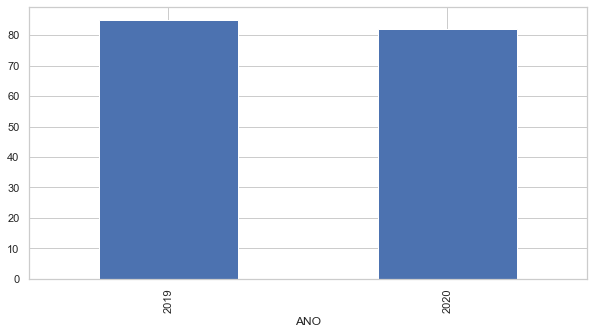

In [9]:
plt.subplots(figsize=(10,5))

porte_ilegal_armas = df.groupby('ANO')['OCORRÊNCIAS DE PORTE ILEGAL DE ARMA'].sum()

porte_ilegal_armas.plot.bar()
porte_ilegal_armas

### 2 - 2019 teve menos ocorrências por tráfico de entorpecentes em relação ao ano de 2020

#### Falso. Em 2019 houve mais ocorrências por tráfico de entorpencentes do que em 2020

ANO
2019    599
2020    490
Name: OCORRÊNCIAS DE TRÁFICO DE ENTORPECENTES, dtype: int64

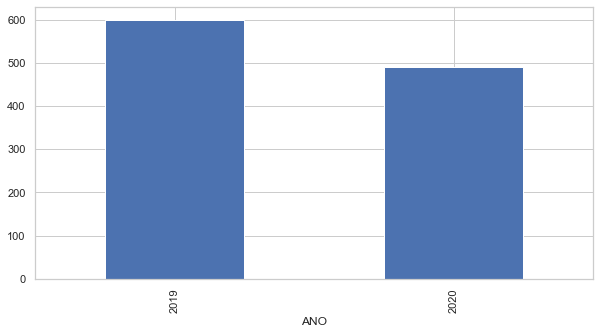

In [10]:
plt.subplots(figsize=(10,5))

ocorr_traf_ent = df.groupby('ANO')['OCORRÊNCIAS DE TRÁFICO DE ENTORPECENTES'].sum()

ocorr_traf_ent.plot.bar()
ocorr_traf_ent

### 3 - Em 2020, o número de veículos recuperados foi maior em Março.

#### Falso. Em 2020, o número de veículos recuperados foi maior em Janeiro.

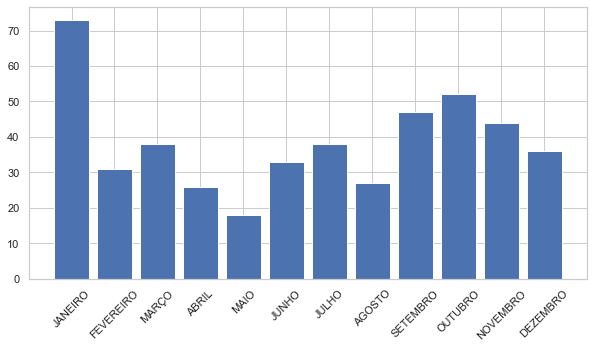

In [11]:
# df.query('ANO == 2020') - Pega os dados apenas do ano de 2020

plt.subplots(figsize=(10,5))
plt.xticks(rotation = 45);
meses = df.query('ANO == 2020')['MÊS']
ocorrencias = df.query('ANO == 2020')['Nº DE VEÍCULOS RECUPERADOS']
plt.bar(meses, ocorrencias)
plt.show()

### 4 - O número de presos em flagrantes é maior que o número de presos por mandado em 2 anos

#### Verdadeiro. Em 2 anos, o número de presos em flagrantes foi quase 5 vezes o número de presos por mandado

In [12]:
flagrante_total = df.groupby('ANO')['Nº DE INFRATORES APREENDIDOS EM FLAGRANTE'].sum().sum()
mandado_total = df.groupby('ANO')['Nº DE INFRATORES APREENDIDOS POR MANDADO'].sum().sum()

total = {'Tipo': ['Flagrantes','Mandados'],
         'Resultados': [flagrante_total, mandado_total]
        }

table = pd.DataFrame(total, columns=['Tipo','Resultados'])
table

,Tipo,Resultados
0,Flagrantes,591
1,Mandados,120


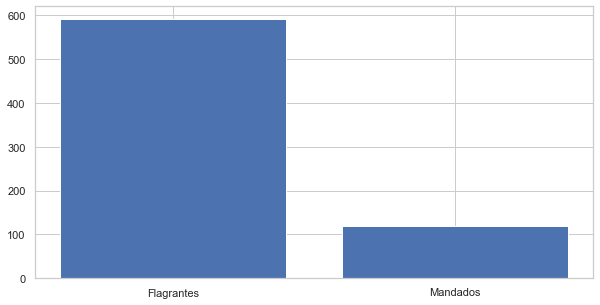

In [13]:
plt.subplots(figsize=(10,5))
infratores = ['Flagrantes', 'Mandados']
valores = [flagrante_total, mandado_total]
plt.bar(infratores, valores)
plt.show()

### 5 - O total de inquéritos policiais instaurados subiu em 2020. O pico, em 2020, foi no mês de Março.

#### 1 - Falso. O número total de inquéritos policiais caiu de 2019 para 2020.
#### 2 - Falso. O pico, em 2020, foi no mês de Setembro.

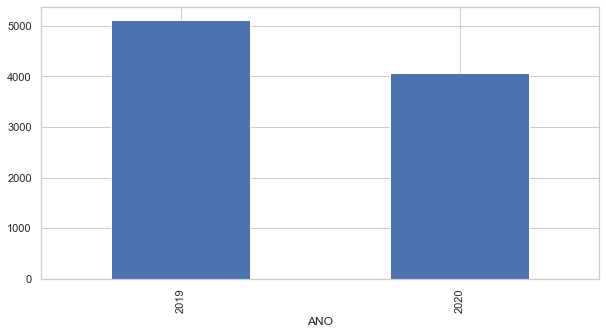

In [14]:
plt.subplots(figsize=(10,5))

total_inquerito = df.groupby('ANO')['TOT. DE INQUÉRITOS POLICIAIS INSTAURADOS'].sum()

total_inquerito.plot.bar();

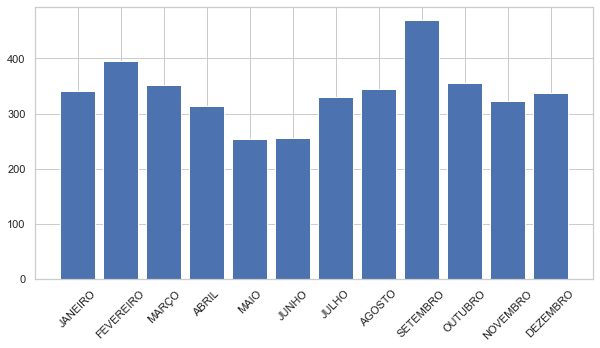

In [15]:
plt.subplots(figsize=(10,5))
plt.xticks(rotation = 45);
meses = df.query('ANO == 2020')['MÊS']
ocorrencias = df.query('ANO == 2020')['TOT. DE INQUÉRITOS POLICIAIS INSTAURADOS']
plt.bar(meses, ocorrencias)
plt.show()

### 6 - O número de prisões efetuadas foi maior em Outubro de 2020 do que em Fevereiro de 2019.

#### Verdadeiro. Analisando o gráfico, em Outubro de 2020 houve mais prisões do que em Fevereiro de 2019.

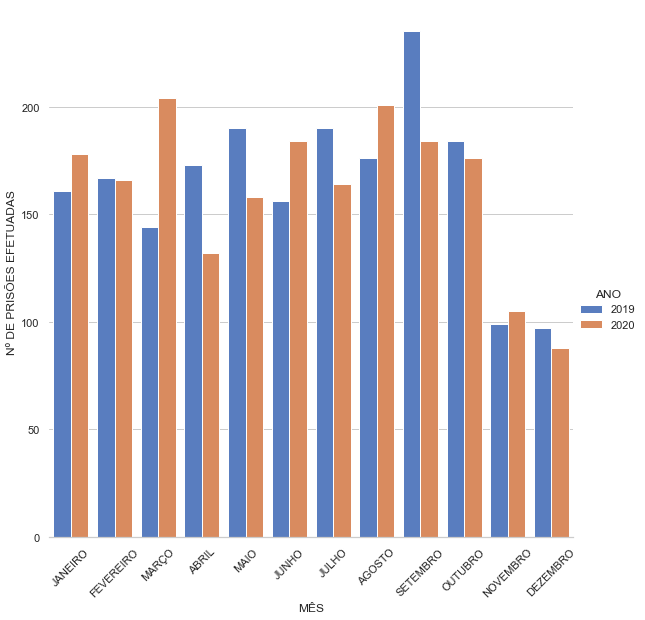

In [16]:
g = sns.factorplot(x="MÊS", y="Nº DE PRISÕES EFETUADAS", hue="ANO", data=df, size=8, kind="bar", palette="muted")
g.despine(left=True)
plt.xticks(rotation = 45);
plt.show()